<a href="https://colab.research.google.com/github/httpitshazel/UTS_ML2019_ID12839712/blob/master/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ASSIGNMENT 2 MACHINE LEARNING**

Name: Hazel Marie Aguila Malaluan 

Student Number: 12839712



Name: Zhengkai Liu

Student Number: 12504080

**Introduction** 

This reports conveys the implementation of a decision tree algorithm using the NSW school healthy canteen statistics obtained from the NSW Government website.

A decision tree algorithm can be used for both classification and regression cases.


The reason for choosing a decision tree algorithm is for its simplicity meaning it can be applied in a wide range of industries and disciplines. The algorithm is easy to understand for people that do not have analytical background, which is advantageous as this project can be viewed by them. 
It also makes the viewer perceive the logic for the data to translate unlike black box algorithms such as SVM and NN.
Decision tree does not require a lot of data cleaning compared to other techniques and it is not affected by outliers and missing values that much.
In the case of our dataset, this algorithm was chosen because it performs well with categorical data, attribute-value pairs data  and with discete output values such as 'yes' or 'no'.

In [0]:
from google.colab import files
from IPython.display import Image

In [3]:
uploaded = files.upload()

Saving ID3_algorithm_decision_tree.png to ID3_algorithm_decision_tree.png


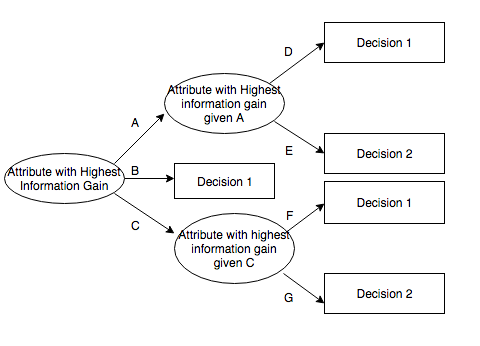

In [4]:
Image('ID3_algorithm_decision_tree.png',
     width = 400)

**Exploration** 
- identify challenges

The main challenge of our project is to identify the schools that need a healthy canteen.
The NSW school healthy canteen dataset is comprised of 6 attributes:
- Level_of_schooling (e.g. Primary, Secondary etc.)
- subtype (e.g. Kinder to Year 12)
- Preschool_ind (e.g. Y for yes or N for No)
- gender (e.g. Coed, Girls or Boys)
- Late_opening (e.g. Y for yes or N for No)
- Healthy_canteen (e.g. Y for yes or N for No)

The dataset has 2214 values.



In [0]:
from google.colab import files
from IPython.display import Image

In [6]:
uploaded = files.upload()

Saving Screenshot 2019-09-25 13.49.36.png to Screenshot 2019-09-25 13.49.36.png


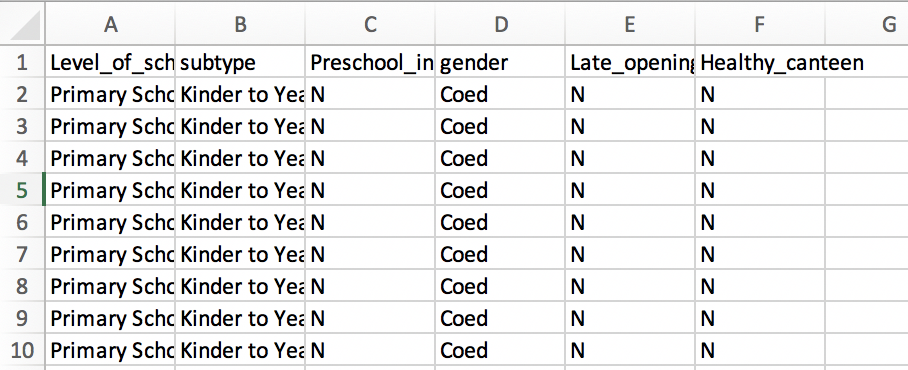

In [7]:
Image('Screenshot 2019-09-25 13.49.36.png',
     width = 400)

**Methodology** 

The ID3 Decision Tree Algorithm implementation 



In [0]:
def max_val_item(self, src_dict, parent_keys, child_key):
		#The judgment operator of the max function and the min function must have an equal decision, otherwise an incorrect decision tree will be obtained.
        if type(src_dict).__name__ != 'dict':
            print('type error:expace dict, acturl',type(src_dict).__name__)
            return None
        ret_key, max_val = None, -9527
        for key in parent_keys:
            if key in src_dict.keys() and child_key in src_dict[key]:

                if src_dict[key][child_key] > max_val:  
                    ret_key, max_val = key, src_dict[key][child_key]
        return ret_key

    def min_val_item(self, src_dict, parent_keys, child_key):
        if type(src_dict).__name__ != 'dict':
            print('type error:expace dict, acturl',type(src_dict).__name__)
            return None
        ret_key, min_val = None, 9527
        for key in parent_keys:
            if key in src_dict.keys() and child_key in src_dict[key]:

                if src_dict[key][child_key] <= min_val:
                        ret_key, min_val = key, src_dict[key][child_key]
        return ret_key

Cutting specifications.

Assume that the optimal root node of the decision tree that has selected this sample set by the information gain is characterised by the gender.

1.Delete the gender feature value for all rows where Coed is located.

2.Then delete the gender feature value column

In [0]:
class CTailorSamples(object):
	#Crop sample
    def __init__(self, data_list, feat_type_list, feat_type_index, feat_value):
        self.data_list = data_list
        self.feat_type_list = feat_type_list
        self.feat_type_index_tailed = feat_type_index
        self.feat_value_tailed = feat_value
        self.tailer_work()

    def get_samples(self):
		#Return the cropped sample
        return self.data_list, self.feat_type_list

    def get_all_indexs(self, src_list, dst_value):

        dst_val_index = [i for i,x in enumerate(src_list) if x == dst_value]
        return dst_val_index
    def tailer_work(self):

        del self.feat_type_list[self.feat_type_index_tailed]
		#Extract the deleted feature column
        colum_to_del = self.feat_type_index_tailed
        self.feat_value_list = [sample[colum_to_del] for sample in self.data_list]
		#Find the subscript of the line containing all the samples of the self.feat_value_tailed
        rows_to_del = self.get_all_indexs(self.feat_value_list, self.feat_value_tailed)
		#Delete the row of elf.src_data_list corresponding to the row index in row_index_list
        rows_to_del.reverse()
        for row in rows_to_del:
            del self.data_list[row]
		# Delete the given feature column
        for row in range(len(self.data_list)):
            del self.data_list[row][colum_to_del]
        return self.data_list, self.feat_type_list

In [0]:

    def get_sample_cnt(self, feat_values, val, class_values, label):
		#feat_values = ['N','N','N','Y']
		#class_values = ['N','N','Y','N']
		#When the same index, the feature value is high and the classification value is the total number of refuses is 2
        if type(feat_values).__name__ != 'list':
            print('type error:param1 expect list, actual', type(feat_values).__name__)
            return None
        if type(class_values).__name__ != 'list':
            print('type error:param2 expect list, actual', type(feat_values).__name__)
            return None
        if len(feat_values) != len(class_values):
            print('len error:param1 and param2 are of different length')
            return None
        
        ret_cnt = 0
        for i in range(len(feat_values)):
            pair_tuple = (feat_values[i], class_values[i])
            if pair_tuple == (val, label):
                ret_cnt += 1
        return ret_cnt
        
    def shan_ent_ele(self, p):
        if 0 == p:  
            return 0
        else:  
            return -1 * p * math.log2(p)

Entropy is one of the ID3 metrics that calculates the uncertainty of the samples. The higher is the entropy at this stage of the tree, the less information is knwon therefore the better the classification can be improved. 

In [0]:
def pickout_samples_shannon_entropy(self):  
		#Calculate the entropy of the samples
		#Classification label distribution of statistical sample sets
        label_set = set(self.class_list) 
        label_cnt_list = [] 
        for label in label_set:  
            label_cnt_list.append(self.class_list.count(label))  
		#Statistical sample set classification label probability density
        n_samples = len(self.class_list)  
        label_prob_list = [label_cnt/n_samples for label_cnt in label_cnt_list]  
		#Calculating the entropy of the sample
        self.samples_shanon_entropy = self.shan_ent(label_prob_list)  
        return self.samples_shanon_entropy

Information Gain

The Information Gain is the calculation of the difference in entropy from the previous sample split to after splitting sample on an attribute. Therefore it is the reduction of entropy of the attribute when splitting a decision tree node. The attribute that has the largest reduction entropy reduction is the best choice to minimise the decision tree depth.


The decision tree is created containing the attribute chosen because of high reduction in entropy and the recurse on the subsets with the remaining attribute that have lower reduction in entropy.

In [0]:
def create_tree(self):

        dh = CDictHelper()

        root = dh.max_val_item(self.stat_dict, self.feat_list, 'info_gain')
        feat, feat_ind = root, self.feat_list.index(root)

        val_set = set(self.feat_value_list[feat_ind])
        rcond = value = dh.min_val_item(self.stat_dict[feat], val_set, 'ent')
        lcond = dh.max_val_item(self.stat_dict[feat], val_set, 'ent')

        class_set = set(self.class_list)
        rnode = dh.max_val_item(self.stat_dict[feat][value], class_set, 'p_self')
        lnode = dh.min_val_item(self.stat_dict[feat][value], class_set, 'p_self')

        if self.n_feats >= self.leastFeatNum:
            tailor = CTailorSamples(self.data_list, self.feat_list, feat_ind, value)
            new_samples_list, new_feat_list = tailor.get_samples()
            child_samples = CID3DecisionTree(new_samples_list, new_feat_list, self.leastFeatNum)
            lnode = child_samples.create_tree()
            
		#Fill decision tree
        self.tree_dict = {}
        self.tree_dict[root] = {}       
        self.tree_dict[root][rcond] = rnode
        self.tree_dict[root][lcond] = lnode
        return self.tree_dict


Constraints were set on the decison tree size. We used various parameters such as:

- Minimum number of samples for a terminal node (leaf)

In [0]:
def get_leafs_num(tree_dict):


    leafs_num = 0
    if len(tree_dict.keys()) == 0:
        print('input tree dict is void!!!!!')
        return 0

    root = list(tree_dict.keys())[0]

    child_tree_dict =tree_dict[root]
    for key in child_tree_dict.keys():

        if type(child_tree_dict[key]).__name__=='dict':

            leafs_num += get_leafs_num(child_tree_dict[key])
        else:

            leafs_num += 1

    return leafs_num

- Maximum depth of the decision tree

In [0]:
def get_tree_max_depth(tree_dict):


    max_depth = 0
    if len(tree_dict.keys()) == 0:
        print('input tree_dict is void!')
        return 0

    root = list(tree_dict.keys())[0]

    child_tree_dict = tree_dict[root]
    for key in child_tree_dict.keys():

        this_path_depth = 0

        if type(child_tree_dict[key]).__name__ == 'dict':

            this_path_depth = 1 + get_tree_max_depth(child_tree_dict[key])
        else:

            this_path_depth = 1
        if this_path_depth > max_depth:
            max_depth = this_path_depth

    return max_depth

**Evaluation** 
- Perform and Report Testing
- Perform Efficiency Analysis
- Do Possible Comparative Study

In [0]:
from google.colab import files
from IPython.display import Image

In [10]:
uploaded = files.upload()

Saving 71856852_436508473881432_836299818375577600_n.png to 71856852_436508473881432_836299818375577600_n.png


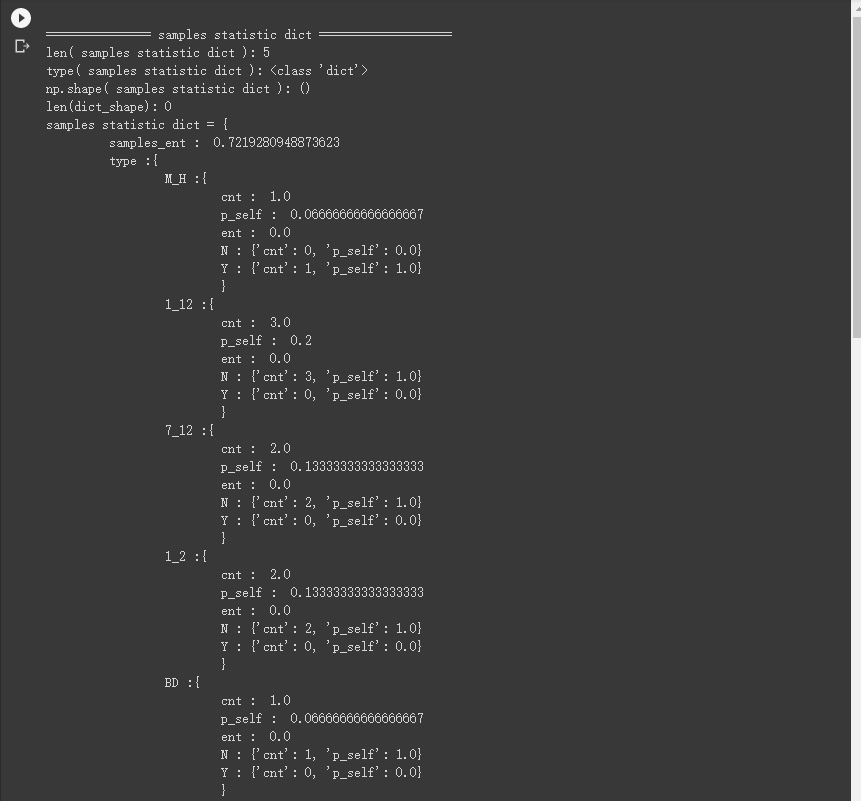

In [11]:
Image('71856852_436508473881432_836299818375577600_n.png',
     width = 400)

In [12]:
uploaded = files.upload()

Saving 71137173_683541735389117_3006071344459677696_n.png to 71137173_683541735389117_3006071344459677696_n.png


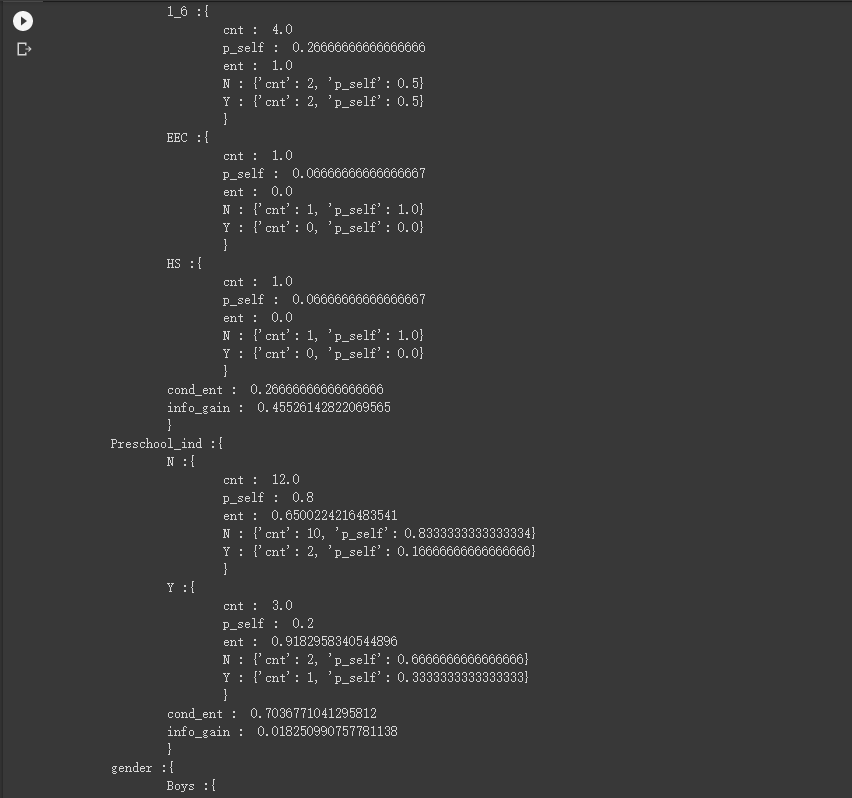

In [13]:
Image('71137173_683541735389117_3006071344459677696_n.png',
      width = 400)

In [15]:
uploaded = files.upload()

Saving 70873679_379844819570534_8170728908983894016_n.png to 70873679_379844819570534_8170728908983894016_n.png


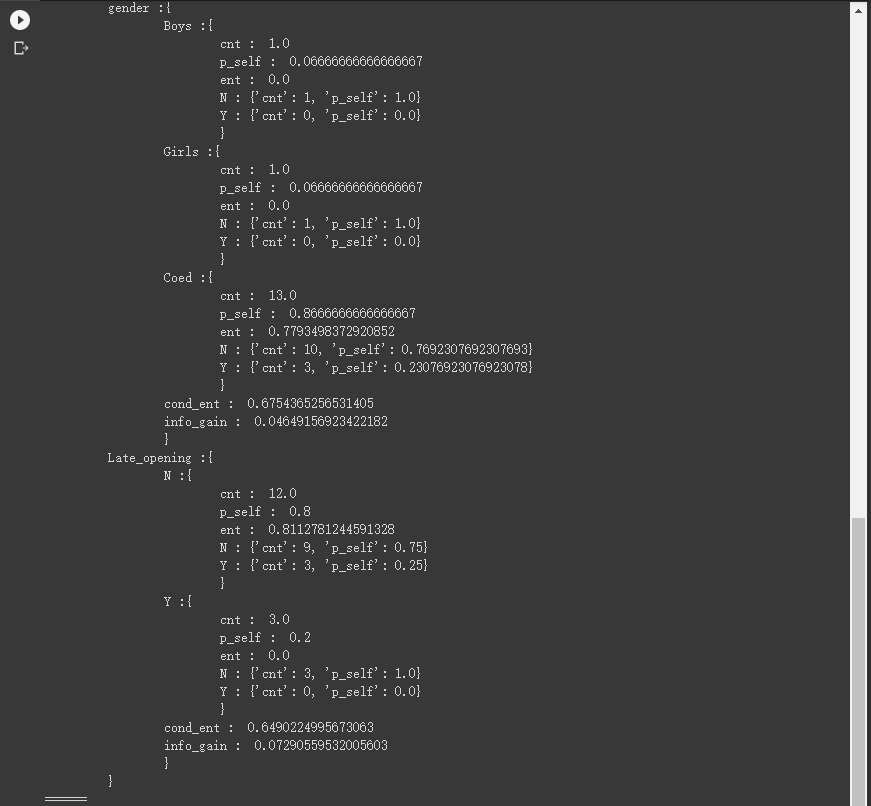

In [16]:
Image('70873679_379844819570534_8170728908983894016_n.png',
      width = 400)

In [18]:
uploaded = files.upload()

Saving 70992852_532074140887213_6766851825321639936_n.png to 70992852_532074140887213_6766851825321639936_n.png


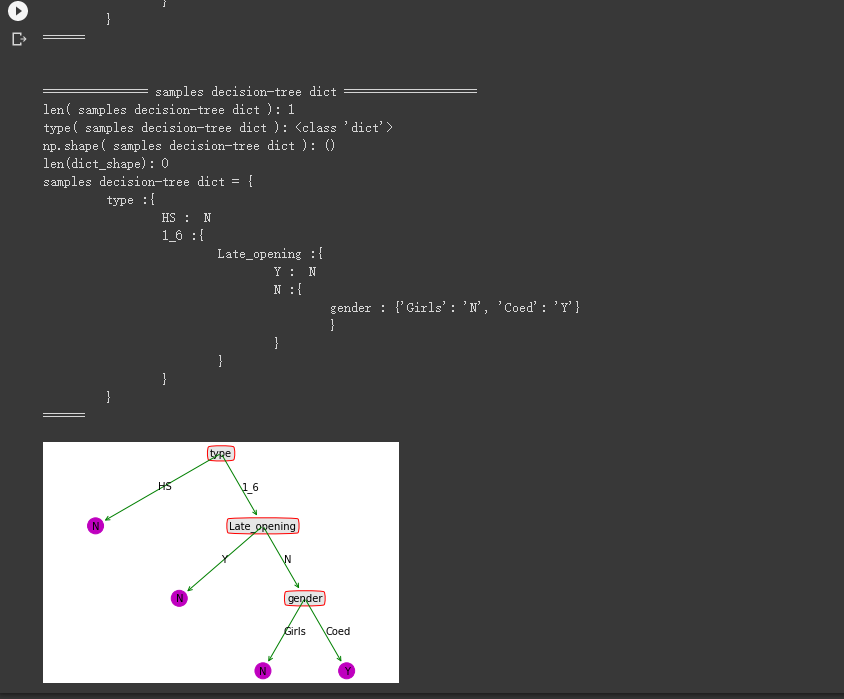

In [19]:
Image('70992852_532074140887213_6766851825321639936_n.png',
      width = 400)

**Conclusion** 
- Discuss Reflections
- Propose Possible Improvements

In conclusion the dataset chosen could have had more attributes to show the ID3 algorithm better. The dataset used, only had 6 attributes which does not effectively show the results 

The complete implementation of the ID3 Algorithm can be found in github UTS_ML2019_ID12839712 in the following link:
https://github.com/httpitshazel/UTS_ML2019_ID12839712

**Ethical** W-200

**Video Pitch**